In [1]:
import pandas as pd

In [41]:
df_contemp = pd.read_csv("data/df_contemp.csv")
df_contemp

,title,author,fmc_name,year,author_gender,master_genre,Q4.answer,Q4.explanation,Q5.answer,Q5.explanation,...,Q26.explanation,Q27.answer,Q27.explanation,Q28.answer,Q28.explanation,Q29.answer,Q29.explanation,prop_pos,prop_neg,diff_prop
0,Wildflower Hill,"Freeman, Kimberley",Beattie Blaxland,2010,1,Historical Fiction,0.0,There is no indication that Beattie is saved b...,0.0,There is no mention of Beattie saving a male c...,...,There is no mention of Beattie being admired s...,1.0,Beattie is admired for her intelligence and re...,0.0,Beattie does not have a lower rank occupation;...,1.0,Beattie has a higher rank occupation as a farm...,0.307692,0.615385,-0.307692
1,Oracle Night,"Auster, Paul",Grace,2003,0,Literary Fiction,0.0,No evidence of Grace being saved by a male cha...,0.0,Grace does not save any male character.,...,"Resemblance to Siri Hustvedt noted[1], but no ...",NaN,"Professional role implies competence, but inte...",0.0,Art director role is mid/high-ranking[7].,1.0,Holds a managerial position in publishing[7].,0.333333,0.375000,-0.041667
2,Eleanor Rigby,"Coupland, Douglas",Liz Dunn,2004,0,Literary Fiction,0.0,Jeremy's arrival disrupts Liz's isolation but ...,1.0,Liz becomes Jeremy's primary caregiver during ...,...,Described as 'plain' and self-conscious about ...,NaN,Intelligence isn't discussed as a trait.,NaN,Specific occupation rank unclear.,NaN,No managerial/professional role described.,0.416667,0.444444,-0.027778
3,Journal 64 Department Q 4,"Adler-Olsen, Jussi",Nete Rosen,2010,0,Mystery,0.0,There is no indication that Nete Rosen is save...,0.0,There is no indication that Nete Rosen saves a...,...,There is no indication that Nete Rosen is admi...,0.0,There is no indication that Nete Rosen is admi...,0.0,There is no indication that Nete Rosen has a l...,0.0,There is no indication that Nete Rosen has a h...,0.076923,0.461538,-0.384615
4,The Revealers,"Wilhelm, Doug",Catalina,2003,0,YA,0.0,Catalina collaborates with male peers but isn'...,0.0,No instances of physically saving male characters,...,Physical appearance not emphasized,1.0,Admired for writing skills and resilience,0.0,Student without occupational hierarchy,0.0,Student without occupational hierarchy,0.300000,0.454545,-0.154545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12626,The Woman He Loved Before,"Koomson, Dorothy",Libby Britcham,2013,1,Romance,0.0,There is no indication that Libby is saved by ...,0.0,There is no information suggesting Libby saves...,...,There is no information about Libby being admi...,NaN,There is no information about Libby being admi...,NaN,There is no information about Libby having a l...,NaN,There is no information about Libby having a h...,0.500000,0.444444,0.055556
12627,Earthquake Terror Puffin Novel,"Kehret, Peg",Abby,1996,1,Other,1.0,Abby is rescued after Jonathan provides direct...,0.0,There is no indication that Abby saves a male ...,...,There is no mention of Abby being admired for ...,0.0,There is no mention of Abby being admired for ...,0.0,There is no indication that Abby holds a lower...,0.0,There is no indication that Abby holds a highe...,0.454545,0.384615,0.069930
12628,Truly Madly Deeply,"Kazi, Faraaz",Seema,2010,0,Romance,0.0,There is no indication that Seema is saved by ...,0.0,There is no mention of Seema saving a male cha...,...,Seema is admired for her beauty.,1.0,Seema is also admired for her intelligence.,0.0,Seema does not have a lower rank occupation.,0.0,Seema does not have a higher rank occupation.,0.125000,0.250000,-0.125000
12629,The American Heiress,"Goodwin, Daisy",Cora Cash,2010,1,Historical Fiction,1.0,Cora is saved by the Duke of Wareham after she...,0.0,There is no indication that Cora saves a male ...,...,Cora is admired for her beauty.,0.0,Cora is not particularly noted for her intelli...,0.0,Cora does not have a lower rank occupation.,0.0,Cora does not have a higher rank occupation in...,0.846154,0.076923,0.769231


In [42]:
# How many (fe)male authors?
print(df_contemp['author_gender'].value_counts())

author_gender
1    9147
0    3484
Name: count, dtype: int64


In [5]:
# How many books in what genres? 
print(df_contemp['master_genre'].value_counts())

master_genre
Romance               3050
Fantasy               2096
Historical Fiction    1281
Mystery               1224
Other                 1101
Literary Fiction      1066
YA                    1023
Thriller               926
Science Fiction        657
Horror                 330
Children               202
Name: count, dtype: int64


In [7]:
# Crosstable authors/genre 
ct = pd.crosstab(df_contemp['master_genre'], df_contemp['author_gender'])
print(ct)

author_gender         0     1
master_genre                 
Children             44   158
Fantasy             664  1432
Historical Fiction  344   937
Horror              214   116
Literary Fiction    417   649
Mystery             389   835
Other               337   764
Romance             166  2884
Science Fiction     346   311
Thriller            577   349
YA                  167   856


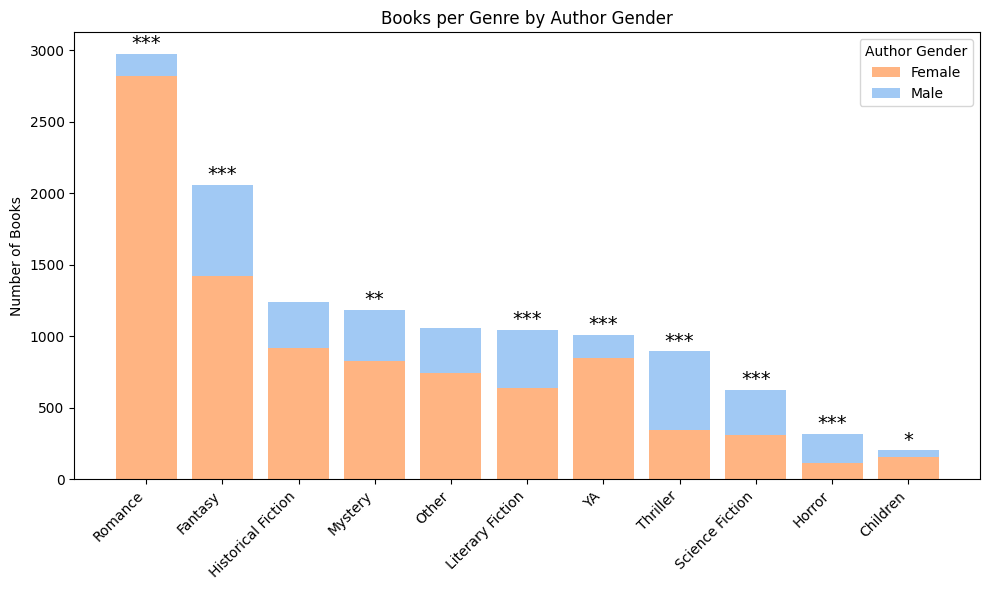

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastel colors
pastel_colors = sns.color_palette('pastel')
pastel_blue = pastel_colors[0]    # Male
pastel_orange = pastel_colors[1]  # Female

# Crosstab
ct = pd.crosstab(df_contemp['master_genre'], df_contemp['author_gender'])
ct.columns = ['Male', 'Female']
ct['Total'] = ct['Male'] + ct['Female']

# Percentages
ct['Female_pct'] = ct['Female'] / ct['Total'] * 100
ct['Male_pct'] = ct['Male'] / ct['Total'] * 100

# Sort by total
ct_sorted = ct.sort_values('Total', ascending=False)

# Significance info
significance_data = pd.DataFrame({
    'Genre': ['Romance', 'Thriller', 'Horror', 'Science Fiction', 'YA',
              'Literary Fiction', 'Fantasy', 'Mystery', 'Children', 'Other', 'Historical Fiction'],
    'p-value': [7.187434e-225, 2.208660e-125, 4.757935e-50, 1.008323e-45, 1.183951e-18,
                3.358027e-16, 1.849512e-04, 4.833278e-03, 4.654181e-02, 7.974452e-02, 2.428984e-01],
    'Significant': [True]*9 + [False]*2
})

# Add significance info to the sorted crosstab
ct_sorted = ct_sorted.reset_index().merge(significance_data, left_on='master_genre', right_on='Genre', how='left')

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bars
bars_female = ax.bar(ct_sorted['master_genre'], ct_sorted['Female'], label='Female', color=pastel_orange)
bars_male = ax.bar(ct_sorted['master_genre'], ct_sorted['Male'], bottom=ct_sorted['Female'], label='Male', color=pastel_blue)

# Add stars for significant differences
for i, row in ct_sorted.iterrows():
    if row['Significant']:
        # Choose number of stars
        if row['p-value'] < 0.001:
            stars = '***'
        elif row['p-value'] < 0.01:
            stars = '**'
        else:
            stars = '*'

        # Add stars closer to the top of the bars
        total_height = row['Female'] + row['Male']
        ax.text(i, total_height + 5, stars, ha='center', va='bottom', fontsize=14, color='black')

# Axis and legend settings
ax.set_xticks(range(len(ct_sorted['master_genre'])))
ax.set_xticklabels(ct_sorted['master_genre'], rotation=45, ha='right')
ax.set_ylabel('Number of Books')
ax.set_title('Books per Genre by Author Gender')
ax.legend(title='Author Gender')

plt.tight_layout()
plt.show()


# Stereotypicality descriptives 
## Amounts of NA per Item

notable item descriptives (histogram of NA, 0, 1 → e.g. which ones are almost always answered with yes/no/NA?)

- high amount of 0: Q11, Q14, Q24, Q28
  - Q11: Is the female character a perpetrator or does she harm a male character? (0 = no, 1 = yes, 99 = no information) 
  - Q14: Is the female character physically weak/incapable? (0 = no, 1 = yes, 99 = no information) 
  - Q24: Is the female character a homemaker? (0 = no, 1 = yes, 99 = no information)  
  - Q28: Does the female character have a lower rank occupation (e.g., nurse, assistant, maid, …)? (0 = no, 1 = yes, 99 = no information)
  
- high amount of 1: Q9, Q17, Q23
  - Q9: Does the female character solve her own problem through skill? (0 = no, 1 = yes, 99 = no information) 
  - Q17: Is the female character brave/likes taking risks/challenges? (0 = no, 1 = yes, 99 = no information) 
  - 23: Does the female character maintain personal goals and boundaries, even when others express emotional needs or expectations? (0 = no, 1 = yes, 99 = no information) 

- high(er) amount of NAs: Q5, Q7, Q8, Q12, Q20, Q26
  - Q5: Does the female character save a male character? (0 = no, 1 = yes, 99 = no information) 
  - Q7: Does the female character protect a male character? (0 = no, 1 = yes, 99 = no information) 
  - Q8: Is the female character’s problem solved through help or luck? (0 = no, 1 = yes, 99 = no information) 
  - Q12: Does the female character follow orders? (0 = no, 1 = yes, 99 = no information) 
  - Q20: Is the female character emotionally aware and attuned to others' needs, moods, or the dynamics between people, and tries to maintain harmony? (0 = no, 1 = yes, 99 = no information) 
  - Q26: Is the female character admired for her beauty? (0 = no, 1 = yes, 99 = no information) 

In [ ]:
item_labels = {
    'Q4.answer':  '1-POS: Is the female character saved by a male character?',
    'Q5.answer':  '1-NEG: Does the female character save a male character?',
    'Q6.answer':  '2-POS: Is the female character protected by a male character?',
    'Q7.answer':  '2-NEG: Does the female character protect a male character?',
    'Q8.answer':  '3-POS: Is the female character’s problem solved through help or luck?',
    'Q9.answer':  '3-NEG: Does the female character solve her own problem through skill?',
    'Q10.answer': '4-POS: Is the female character victimized/harmed by a male character?',
    'Q11.answer': '4-NEG: Is the female character a perpetrator or does she harm a male character?',
    'Q12.answer': '5-POS: Does the female character follow orders?',
    'Q13.answer': '5-NEG: Does the female character give orders?',
    'Q14.answer': '6-POS: Is the female character physically weak/incapable?',
    'Q15.answer': '6-NEG: Is the female character physically strong/capable?',
    'Q16.answer': '7-POS: Is the female character fearful/scared of taking risks/challenges?',
    'Q17.answer': '7-NEG: Is the female character brave/likes taking risks/challenges?',
    'Q18.answer': '8-POS: Does the female character care for others (e.g., nurses someone, comforts someone, takes care of children or sick)?',
    'Q19.answer': '8-NEG: Does the female character not engage in caregiving behaviors (e.g., focuses on tasks or goals without providing emotional or physical support to others)?',
    'Q20.answer': '9-POS: Is the female character emotionally aware and attuned to others\' needs, moods, or the dynamics between people, and tries to maintain harmony?',
    'Q21.answer': '9-NEG: Does the female character focus more on practical matters or impersonal concerns than others’ emotions or social dynamics?',
    'Q22.answer': '10-POS: Does the female character sacrifice her own goals, desires, or needs to prioritize someone else’s wellbeing or to avoid conflict?',
    'Q23.answer': '10-NEG: Does the female character maintain personal goals and boundaries, even when others express emotional needs or expectations?',
    'Q24.answer': '11-POS: Is the female character a homemaker?',
    'Q25.answer': '11-NEG: Is the female character a breadwinner?',
    'Q26.answer': '12-POS: Is the female character admired for her beauty?',
    'Q27.answer': '12-NEG: Is the female character admired for her intelligence?',
    'Q28.answer': '13-POS: Does the female character have a lower rank occupation (e.g., nurse, assistant, maid)?',
    'Q29.answer': '13-NEG: Does the female character have a higher rank occupation (e.g., doctor, manager, ruler)?'
}

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_3242/4284724844.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_3242/4284724844.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_3242/4284724844.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_3242/4284724844.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after

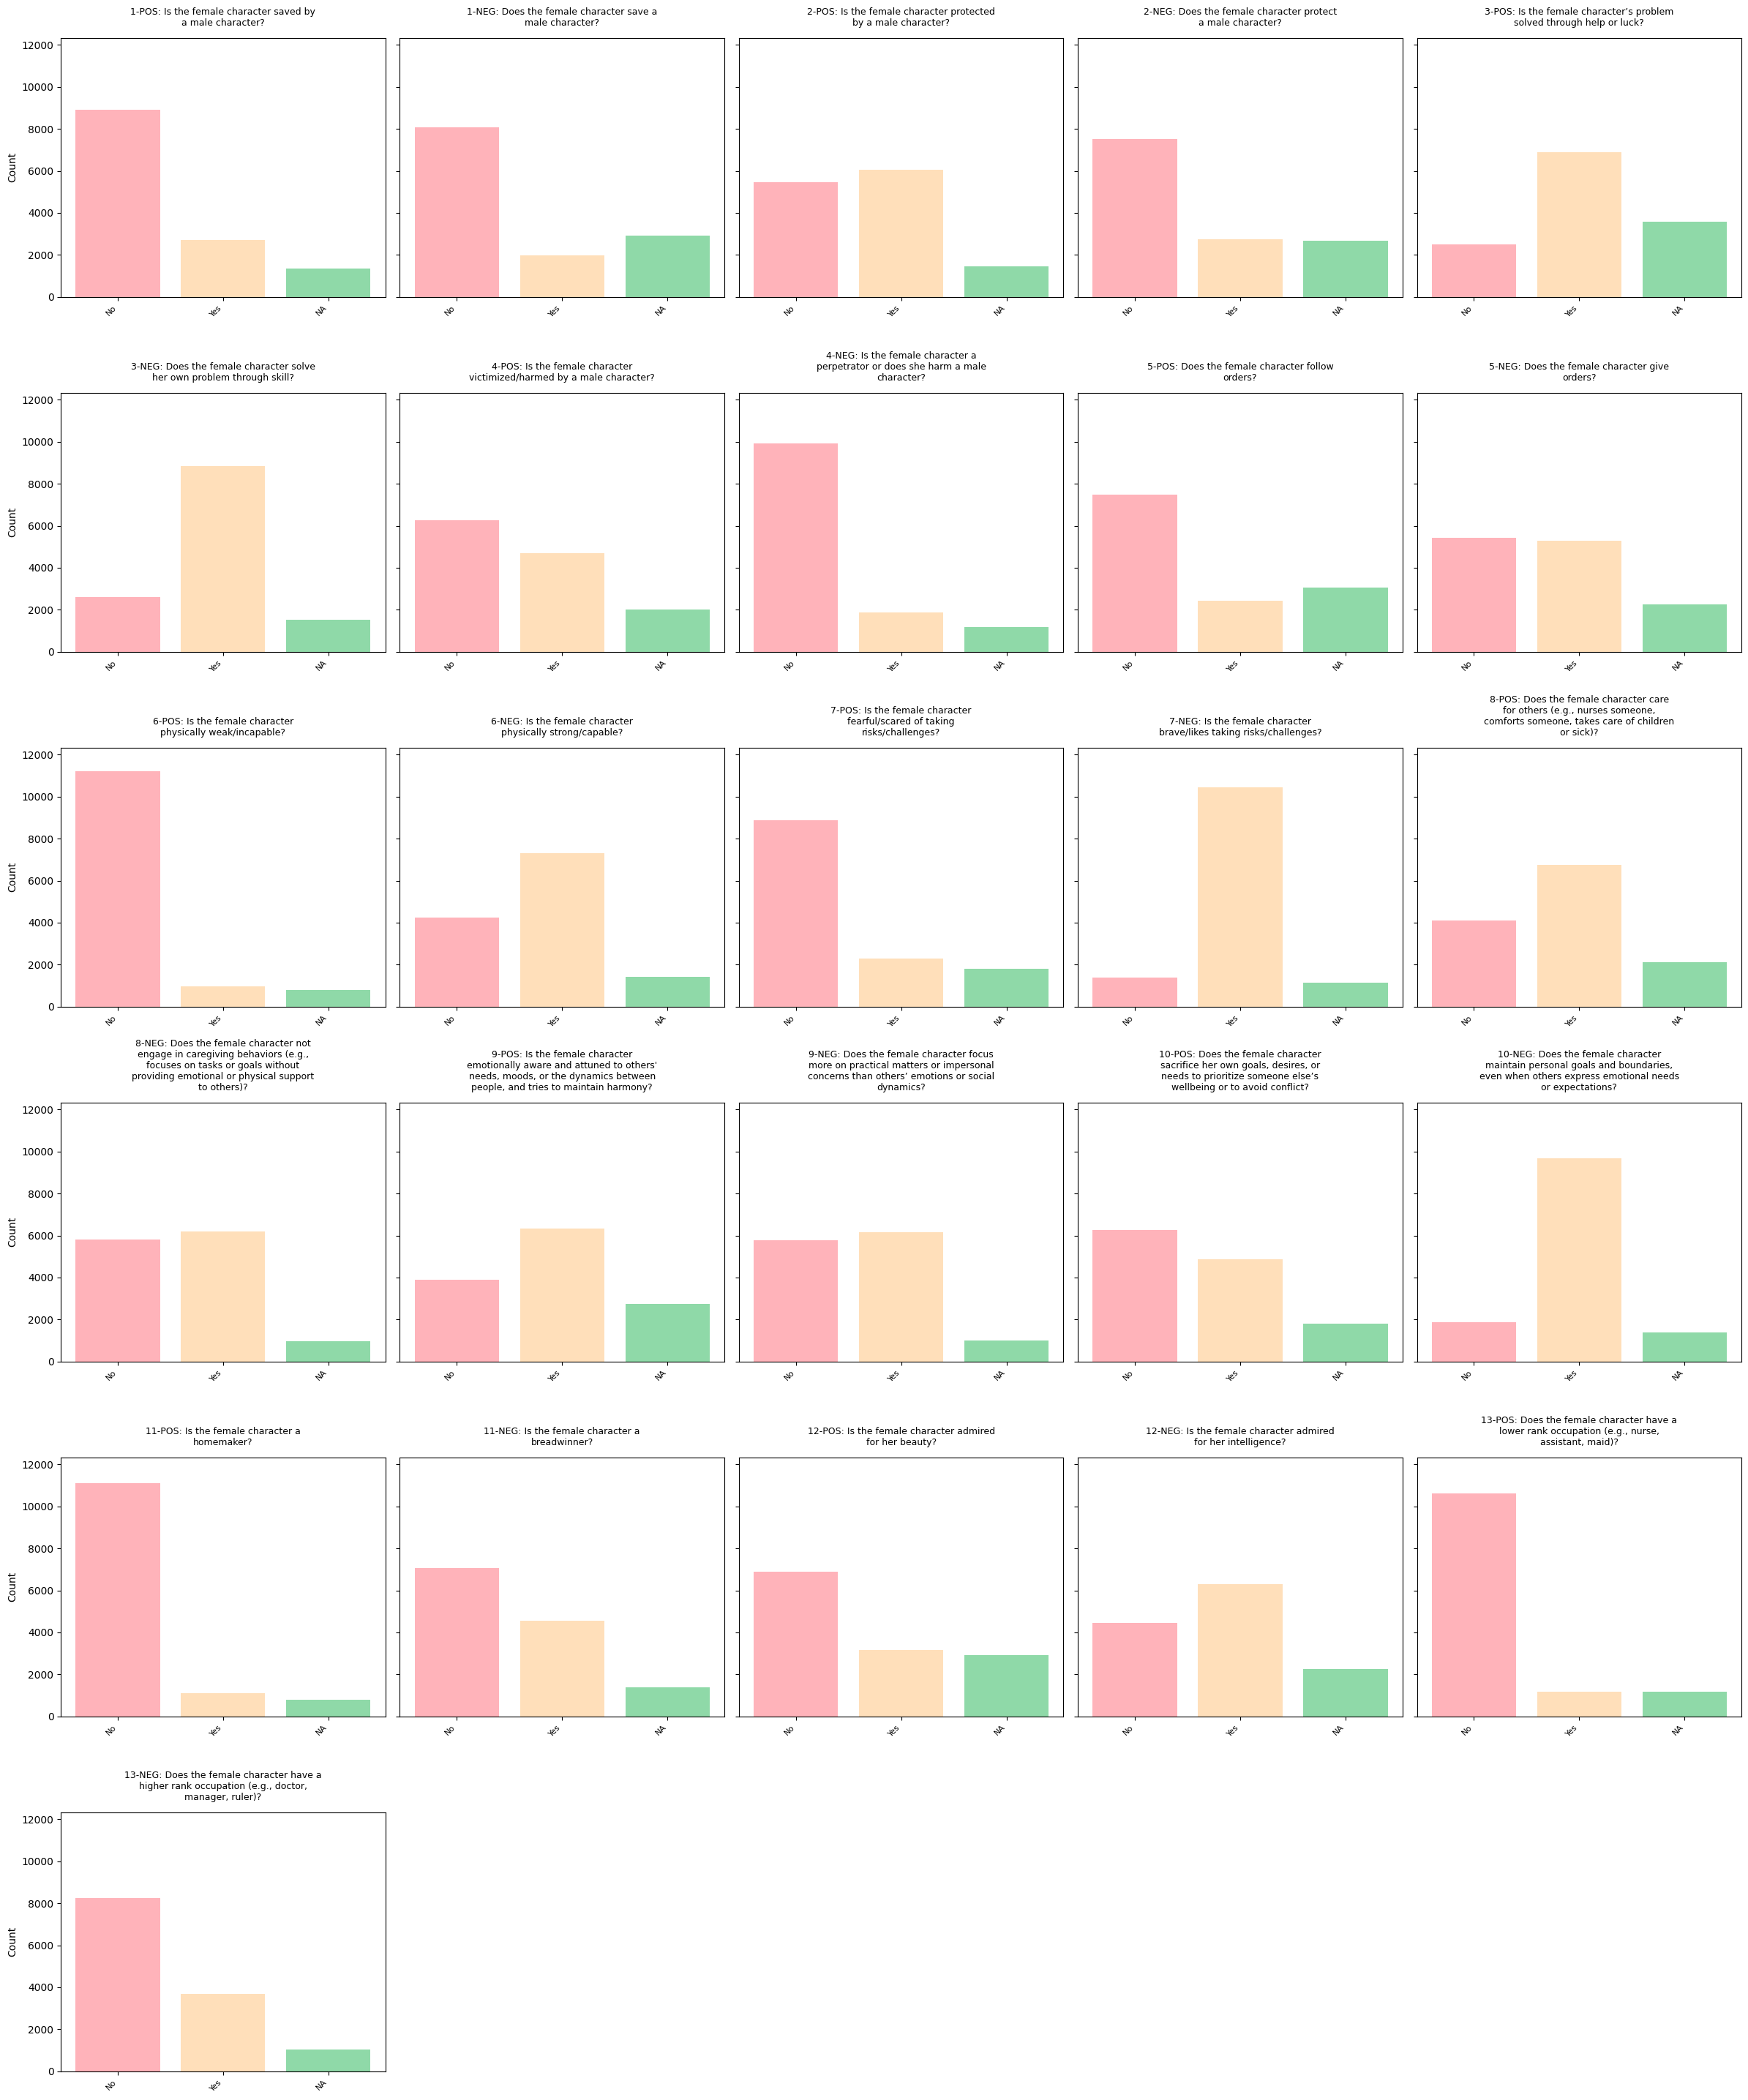

In [33]:
import numpy as np
import textwrap

items = list(item_labels.keys())

# 2. Alle 99er-Werte durch NaN ersetzen, damit 99 und echte NaN zusammenfallen
df2 = df_contemp.copy()
df2.replace(99, np.nan, inplace=True)

# 3. Maximalen Count über alle Items ermitteln (inklusive NaN)
max_count = 0
for col in items:
    counts = df2[col].value_counts(dropna=False)
    max_count = max(max_count, counts.max())

# 4. Pastellige Farben für die drei Kategorien: 0, 1, NaN
colors = ['#FFB3BA', '#FFDFBA', '#8FD9A8']  # Pastellrosa, -orange, -grün

# 5. Figure mit 6×5-Grid anlegen, größer als zuvor, mit mehr Abstand
n_cols = 5
n_rows = 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 30), sharey=True)
fig.subplots_adjust(hspace=1.2)  # Mehr vertikalen Abstand als vorher

# 6. Länge zum Umbrechen definieren (z.B. 40 Zeichen pro Zeile)
wrap_width = 40

for idx, col in enumerate(items):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = axes[row, col_idx]
    
    counts = df2[col].value_counts(dropna=False)
    category_values = [0, 1, np.nan]
    category_counts = [counts.get(val, 0) for val in category_values]
    labels = ['No', 'Yes', 'NA']
    
    # 7. Lange Frage umbrechen
    original_text = item_labels[col]
    wrapped_text = "\n".join(textwrap.wrap(original_text, width=wrap_width))
    
    ax.bar(labels, category_counts, color=colors)
    ax.set_title(wrapped_text, fontsize=9, pad=12)  # pad für mehr Abstand
    ax.set_ylim(0, max_count * 1.1)
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
    if col_idx == 0:
        ax.set_ylabel('Count')

# 8. Übrige Subplots ausblenden
for empty_idx in range(len(items), n_rows * n_cols):
    r = empty_idx // n_cols
    c = empty_idx % n_cols
    axes[r, c].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [29]:
stereotypical_cols = [col for col in df_contemp.columns if col.endswith('.answer') and int(col[1:col.find('.')]) % 2 == 0]
anti_stereotypical_cols = [col for col in df_contemp.columns if col.endswith('.answer') and int(col[1:col.find('.')]) % 2 == 1]

## Percentage of NAs - even/odd

In [30]:
# Calculate % of NAs in even-numbered .answer columns
even_na_percent = df_contemp[stereotypical_cols].isna().mean().mean() * 100

# Calculate % of NAs in odd-numbered .answer columns
odd_na_percent = df_contemp[anti_stereotypical_cols].isna().mean().mean() * 100

print(f"💙 Average % of NAs in even-numbered questions: {even_na_percent:.2f}%")
print(f"💖 Average % of NAs in odd-numbered questions: {odd_na_percent:.2f}%")

💙 Average % of NAs in even-numbered questions: 15.13%
💖 Average % of NAs in odd-numbered questions: 12.51%


## Mean Stereotypicality Scores 

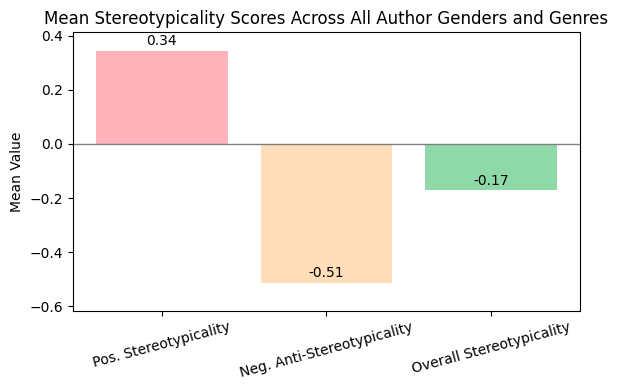

In [34]:
import matplotlib.pyplot as plt

# Get the means
mean_pos = df_contemp['prop_pos'].mean()
mean_neg = -abs(df_contemp['prop_neg'].mean())  # force negative
mean_diff = df_contemp['diff_prop'].mean()

# Data for plotting
labels = ['Pos. Stereotypicality', 'Neg. Anti-Stereotypicality', 'Overall Stereotypicality']
means = [mean_pos, mean_neg, mean_diff]

# Create the bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, means, color=['#FFB3BA', '#FFDFBA', '#8FD9A8'])

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

# Add horizontal line at y=0
plt.axhline(0, color='gray', linewidth=1)

# Rotate x-axis labels if needed
plt.xticks(rotation=15)

# Make it cute!
plt.title("Mean Stereotypicality Scores Across All Author Genders and Genres")
plt.ylabel("Mean Value")
plt.ylim(min(means) * 1.2, max(means) * 1.2)  # scale both ways
plt.tight_layout()
plt.show()


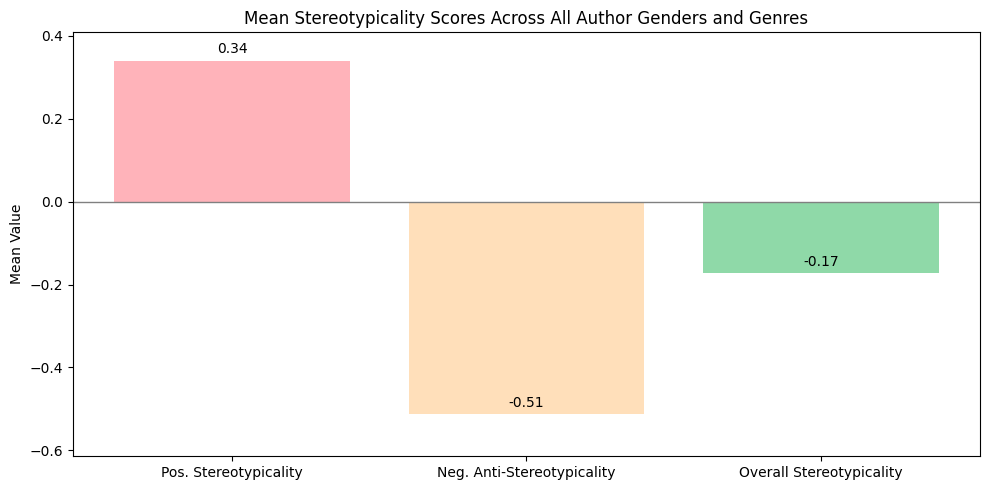

In [44]:
import matplotlib.pyplot as plt

# Get the means
mean_pos = df_contemp['prop_pos'].mean()
mean_neg = -abs(df_contemp['prop_neg'].mean())  # force negative
mean_diff = df_contemp['diff_prop'].mean()

# Data for plotting
labels = ['Pos. Stereotypicality', 'Neg. Anti-Stereotypicality', 'Overall Stereotypicality']
means = [mean_pos, mean_neg, mean_diff]

# Create the bar chart with a wider figure
plt.figure(figsize=(10, 5))  # increased width from 6 to 10
bars = plt.bar(labels, means, color=['#FFB3BA', '#FFDFBA', '#8FD9A8'])

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

# Add horizontal line at y=0
plt.axhline(0, color='gray', linewidth=1)

# No rotation needed now
plt.xticks(rotation=0)

# Add title and axis labels
plt.title("Mean Stereotypicality Scores Across All Author Genders and Genres")
plt.ylabel("Mean Value")
plt.ylim(min(means) * 1.2, max(means) * 1.2)  # scale both ways

# Adjust layout
plt.tight_layout()
plt.show()


In [45]:
mean_pos = df_contemp['prop_pos'].mean()
mean_neg = df_contemp['prop_neg'].mean()
mean_diff = mean_pos - mean_neg

print(f"Mean Pos: {mean_pos:.4f}")
print(f"Mean Neg: {mean_neg:.4f}")
print(f"Mean Difference: {mean_diff:.4f}")


Mean Pos: 0.3405
Mean Neg: 0.5121
Mean Difference: -0.1716


In [46]:
from scipy.stats import ttest_rel

# Run a paired t-test between raw prop_pos and prop_neg
t_stat, p_value = ttest_rel(df_contemp['prop_pos'], df_contemp['prop_neg'])

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("💥 The difference is statistically significant! ✨")
else:
    print("🌸 No significant difference found, Bestie. Keep shining! 🌈")


T-statistic: -52.578
P-value: 0.0000
💥 The difference is statistically significant! ✨


In [40]:
print(df_contemp[['prop_pos', 'prop_neg']].isna().sum())

prop_pos    228
prop_neg    290
dtype: int64


In [34]:
# Correlation between pos and neg score

# Calculate correlation
correlation = df_contemp['prop_pos'].corr(df_contemp['prop_neg'])

print(f"Correlation between prop_pos and prop_neg: {correlation:.3f}")


Correlation between prop_pos and prop_neg: -0.333


In [49]:
from scipy.stats import pearsonr

# Drop missing values pairwise
valid = df_contemp[['prop_pos', 'prop_neg']].dropna()

# Compute Pearson correlation and p-value
r, p = pearsonr(valid['prop_pos'], valid['prop_neg'])

print(f"Pearson correlation: r = {r:.3f}, p = {p:.4f}")


Pearson correlation: r = -0.333, p = 0.0000


In [36]:
# Select your binary item columns
items = df_contemp[['Q4.answer', 'Q5.answer', 'Q6.answer', 'Q7.answer', 'Q8.answer', 'Q9.answer',
        'Q10.answer', 'Q11.answer', 'Q12.answer', 'Q13.answer', 'Q14.answer', 'Q15.answer',
        'Q16.answer', 'Q17.answer', 'Q18.answer', 'Q19.answer', 'Q20.answer', 'Q21.answer',
        'Q22.answer', 'Q23.answer', 'Q24.answer', 'Q25.answer', 'Q26.answer', 'Q27.answer',
        'Q28.answer', 'Q29.answer']]

# Compute the correlation matrix (ignores NA automatically)
cor_matrix = items.corr()

# Optional: Round and print nicely
print(cor_matrix.round(2))

            Q4.answer  Q5.answer  Q6.answer  Q7.answer  Q8.answer  Q9.answer  \
Q4.answer        1.00       0.02       0.53      -0.02       0.33      -0.23   
Q5.answer        0.02       1.00       0.13       0.73       0.03       0.21   
Q6.answer        0.53       0.13       1.00       0.13       0.45      -0.10   
Q7.answer       -0.02       0.73       0.13       1.00      -0.02       0.24   
Q8.answer        0.33       0.03       0.45      -0.02       1.00      -0.02   
Q9.answer       -0.23       0.21      -0.10       0.24      -0.02       1.00   
Q10.answer       0.28       0.02       0.20       0.01      -0.02      -0.07   
Q11.answer       0.00       0.17      -0.04       0.19      -0.18       0.08   
Q12.answer       0.11       0.01       0.16       0.02       0.06      -0.08   
Q13.answer      -0.07       0.26      -0.01       0.34      -0.09       0.32   
Q14.answer       0.10      -0.09       0.04      -0.10      -0.01      -0.26   
Q15.answer       0.08       0.31       0

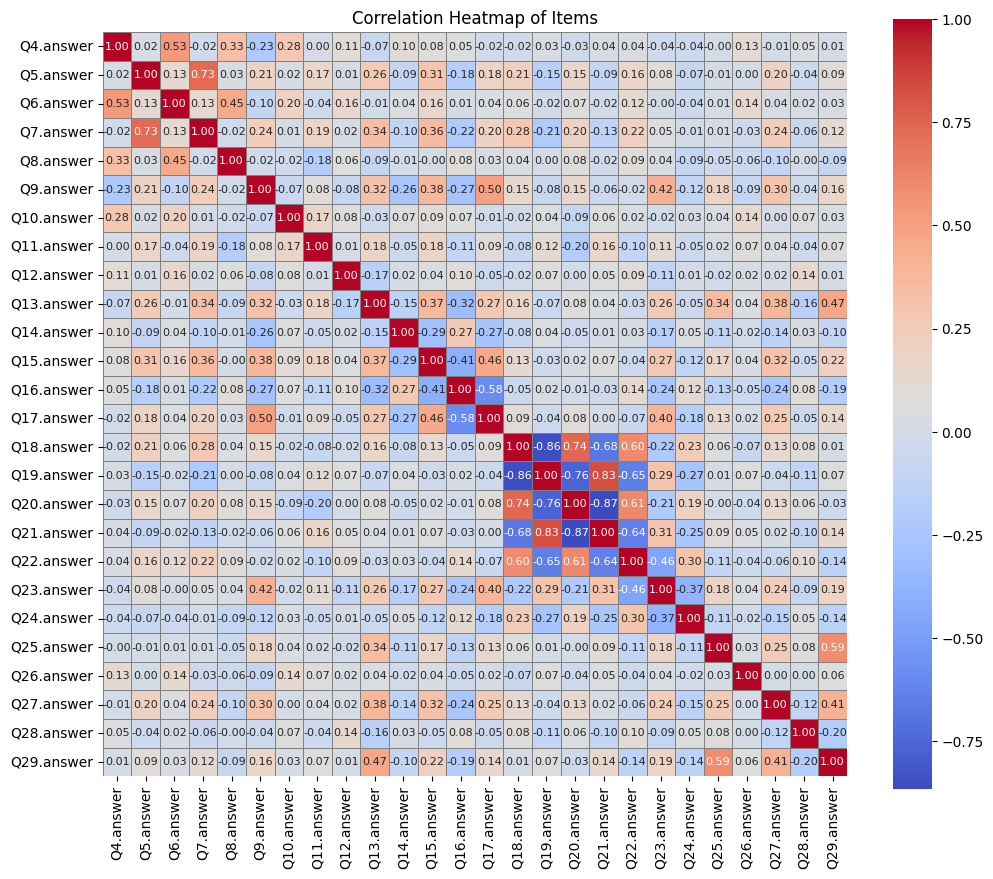

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            square=True, linewidths=0.5, linecolor='gray',
            annot_kws={"size": 8})  
plt.title('Correlation Heatmap of Items')
plt.show()

Q14 Q15 -> -0.3
Q16 Q17 -> -.6
Q18 Q19 -> -.86
Q20 Q21 -> -.87
Q22 Q23 -> -.46

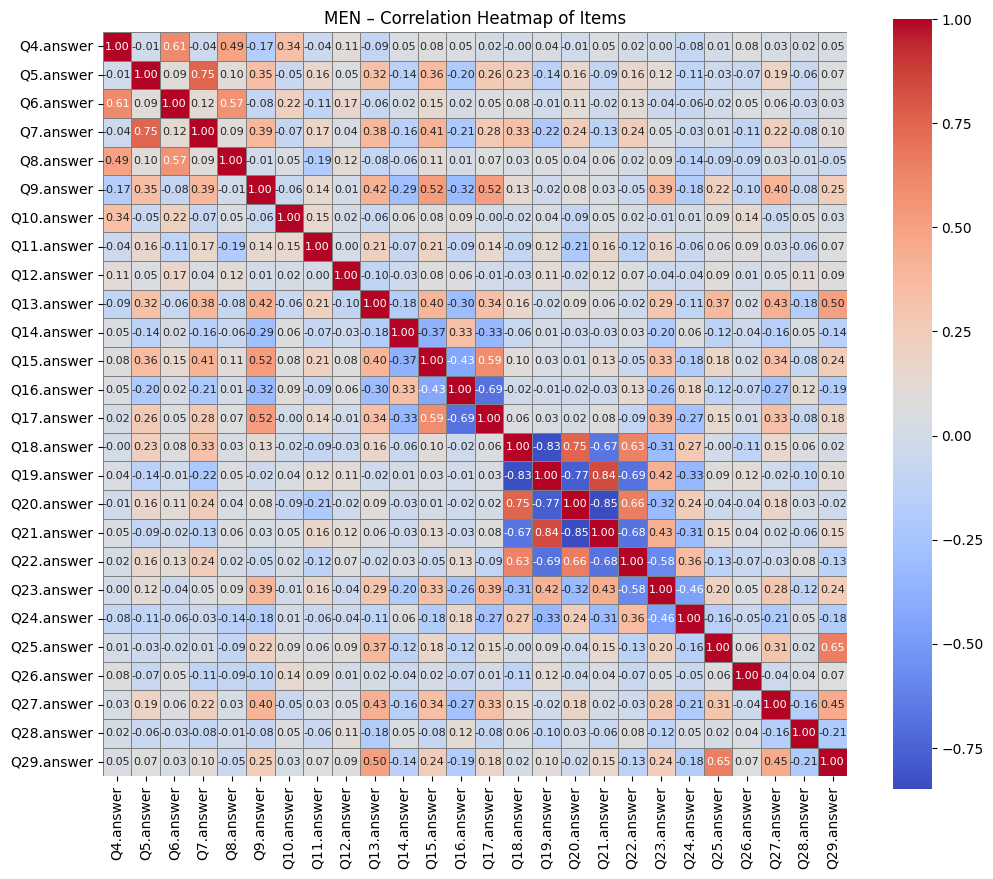

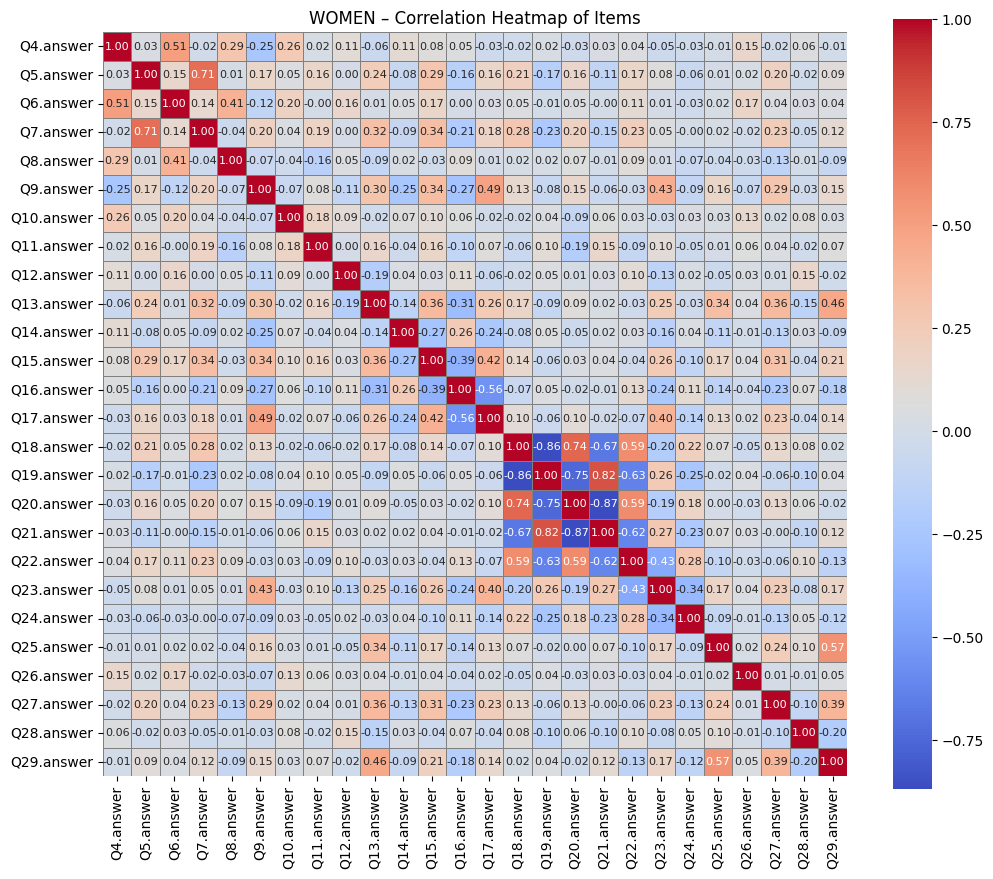

In [50]:
# Männer Frauen
df_men = df_contemp[df_contemp['author_gender'] == 0].copy()
df_women = df_contemp[df_contemp['author_gender'] == 1].copy()

items_men = df_men[['Q4.answer', 'Q5.answer', 'Q6.answer', 'Q7.answer', 'Q8.answer', 'Q9.answer',
        'Q10.answer', 'Q11.answer', 'Q12.answer', 'Q13.answer', 'Q14.answer', 'Q15.answer',
        'Q16.answer', 'Q17.answer', 'Q18.answer', 'Q19.answer', 'Q20.answer', 'Q21.answer',
        'Q22.answer', 'Q23.answer', 'Q24.answer', 'Q25.answer', 'Q26.answer', 'Q27.answer',
        'Q28.answer', 'Q29.answer']]

items_women = df_women[['Q4.answer', 'Q5.answer', 'Q6.answer', 'Q7.answer', 'Q8.answer', 'Q9.answer',
        'Q10.answer', 'Q11.answer', 'Q12.answer', 'Q13.answer', 'Q14.answer', 'Q15.answer',
        'Q16.answer', 'Q17.answer', 'Q18.answer', 'Q19.answer', 'Q20.answer', 'Q21.answer',
        'Q22.answer', 'Q23.answer', 'Q24.answer', 'Q25.answer', 'Q26.answer', 'Q27.answer',
        'Q28.answer', 'Q29.answer']]

cor_matrix_men = items_men.corr()
cor_matrix_women = items_women.corr()

# Heatmap 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix_men, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            square=True, linewidths=0.5, linecolor='gray',
            annot_kws={"size": 8})  
plt.title('MEN – Correlation Heatmap of Items')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix_women, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            square=True, linewidths=0.5, linecolor='gray',
            annot_kws={"size": 8})  
plt.title('WOMEN – Correlation Heatmap of Items')
plt.show()

Q-POS and Q-NEG are NOT always highly correlated, meaning that the occurence of one doesn't correlate with the occurence of the other.

Exception: Q16 + 17, 18+19, 20+21, 22+23  
16. Is the female character fearful/scared of taking risks/challenges? (0 = no, 1 = yes, 99 = no information)   
17. Is the female character brave/likes taking risks/challenges? (0 = no, 1 = yes, 99 = no information)  
18. Does the female character care for others (e.g., nurses someone, comforts someone, takes care of children or sick)? (0 = no, 1 = yes, 99 = no information)   
19. Does the female character not engage in caregiving behaviors (e.g., focuses on tasks or goals without providing emotional or physical support to others)? (0 = no, 1 = yes, 99 = no information)   
20. Is the female character emotionally aware and attuned to others' needs, moods, or the dynamics between people, and tries to maintain harmony? (0 = no, 1 = yes, 99 = no information)   
21. Does the female character focus more on practical matters or impersonal concerns than others’ emotions or social dynamics? (0 = no, 1 = yes, 99 = no information)  
22. Does the female character sacrifice her own goals, desires, or needs to prioritize someone else’s wellbeing or to avoid conflict? (0 = no, 1 = yes, 99 = no information)  
23. Does the female character maintain personal goals and boundaries, even when others express emotional needs or expectations? (0 = no, 1 = yes, 99 = no information) 

In [41]:
import pandas as pd
import numpy as np

# Korrelationen in ein DataFrame „entpacken“, ohne die Diagonale (Selbstkorrelationen)
corr_pairs = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

# Alle Werte in eine lange Liste (Series) mit MultiIndex (Paaren)
corr_pairs_long = corr_pairs.unstack().dropna()

# Sortiere nach absolutem Wert, um die stärksten Zusammenhänge zu finden
top_corr = corr_pairs_long.reindex(corr_pairs_long.abs().sort_values(ascending=False).index)

# Die Top 10 anzeigen (du kannst die Zahl anpassen)
print(top_corr.head(30))


Q21.answer  Q20.answer   -0.865841
Q19.answer  Q18.answer   -0.856358
Q21.answer  Q19.answer    0.825238
Q20.answer  Q19.answer   -0.757821
            Q18.answer    0.743823
Q7.answer   Q5.answer     0.726867
Q21.answer  Q18.answer   -0.676628
Q22.answer  Q19.answer   -0.647173
            Q21.answer   -0.637438
            Q20.answer    0.612903
            Q18.answer    0.601103
Q29.answer  Q25.answer    0.587712
Q17.answer  Q16.answer   -0.581970
Q6.answer   Q4.answer     0.531155
Q17.answer  Q9.answer     0.499794
Q29.answer  Q13.answer    0.473787
Q23.answer  Q22.answer   -0.460450
Q17.answer  Q15.answer    0.460255
Q8.answer   Q6.answer     0.453792
Q23.answer  Q9.answer     0.421740
Q29.answer  Q27.answer    0.412670
Q16.answer  Q15.answer   -0.405466
Q23.answer  Q17.answer    0.398570
Q15.answer  Q9.answer     0.381947
Q27.answer  Q13.answer    0.380879
Q15.answer  Q13.answer    0.373411
Q24.answer  Q23.answer   -0.370960
Q15.answer  Q7.answer     0.360170
Q25.answer  Q13.answ

nicht-Paare (wahrscheinlich interessanter): 
Q21.answer  Q19.answer    0.825238
    19: Does the female character not engage in caregiving behaviors (e.g., focuses on tasks or goals without providing emotional or physical support to others)? (0 = no, 1 = yes, 99 = no information) 
    21: Does the female character focus more on practical matters or impersonal concerns than others’ emotions or social dynamics? (0 = no, 1 = yes, 99 = no information) 

Q20.answer  Q19.answer   -0.757821
    20: Is the female character emotionally aware and attuned to others' needs, moods, or the dynamics between people, and tries to maintain harmony? (0 = no, 1 = yes, 99 = no information)  
    19: Does the female character not engage in caregiving behaviors (e.g., focuses on tasks or goals without providing emotional or physical support to others)? (0 = no, 1 = yes, 99 = no information)  


Q20.answer  Q18.answer    0.743823
    20: Is the female character emotionally aware and attuned to others' needs, moods, or the dynamics between people, and tries to maintain harmony? (0 = no, 1 = yes, 99 = no information) 
    18: Does the female character care for others (e.g., nurses someone, comforts someone, takes care of children or sick)? (0 = no, 1 = yes, 99 = no information)  

-> practical matters: less caregiving - concepts oppose each other
-> caring = attuned to needs 

Q7.answer   Q5.answer     0.726867
    7. Does the female character protect a male character? (0 = no, 1 = yes, 99 = no information) 
    5. Does the female character save a male character? (0 = no, 1 = yes, 99 = no information) 

Q21.answer  Q18.answer   -0.676628
    21: Does the female character focus more on practical matters or impersonal concerns than others’ emotions or social dynamics? (0 = no, 1 = yes, 99 = no information)   
    18: Does the female character care for others (e.g., nurses someone, comforts someone, takes care of children or sick)? (0 = no, 1 = yes, 99 = no information)  

Q22.answer  Q19.answer   -0.647173
    22: Does the female character sacrifice her own goals, desires, or needs to prioritize someone else’s wellbeing or to avoid conflict? (0 = no, 1 = yes, 99 = no information)  
    19: Does the female character not engage in caregiving behaviors (e.g., focuses on tasks or goals without providing emotional or physical support to others)? (0 = no, 1 = yes, 99 = no information)  

Q22.answer  Q21.answer   -0.637438
    22: Does the female character sacrifice her own goals, desires, or needs to prioritize someone else’s wellbeing or to avoid conflict? (0 = no, 1 = yes, 99 = no information)  
    21: Does the female character focus more on practical matters or impersonal concerns than others’ emotions or social dynamics? (0 = no, 1 = yes, 99 = no information)   

Q22.answer  Q20.answer    0.612903
    22: Does the female character sacrifice her own goals, desires, or needs to prioritize someone else’s wellbeing or to avoid conflict? (0 = no, 1 = yes, 99 = no information)    
    20: Is the female character emotionally aware and attuned to others' needs, moods, or the dynamics between people, and tries to maintain harmony? (0 = no, 1 = yes, 99 = no information)  

Q22.answer  Q18.answer    0.601103
    22: Does the female character sacrifice her own goals, desires, or needs to prioritize someone else’s wellbeing or to avoid conflict? (0 = no, 1 = yes, 99 = no information)  
    18: Does the female character care for others (e.g., nurses someone, comforts someone, takes care of children or sick)? (0 = no, 1 = yes, 99 = no information)  

# TODO: ask ChatGPT for interpretation

# manche bestätigen auch dass das LLM die Sachen richtig verstanden hat, zB:
    25. Is the female character a breadwinner? (0 = no, 1 = yes, 99 = no information) 
    29. Does the female character have a higher rank occupation (doctor, manager, ruler, …)? (0 = no, 1 = yes, 99 = no information) 


/Users/svenjakratzke/Desktop/Thesis/thesis/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


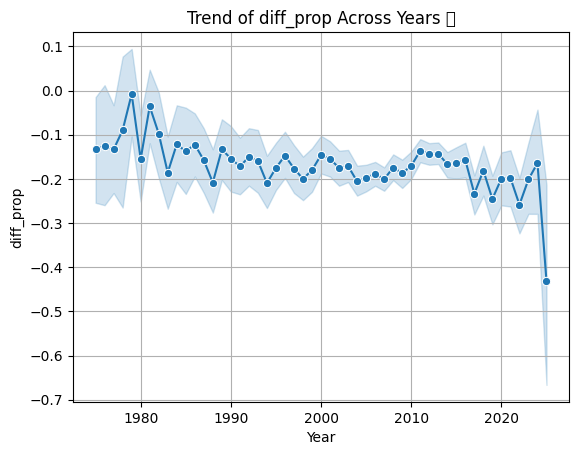

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df_contemp, x='year', y='diff_prop', marker='o')

plt.title('Trend of Overall Stereotypicality Across Years')
plt.xlabel('Year')
plt.ylabel('diff_prop')
plt.grid(True)
plt.show()


In [53]:
# How many books influence the steep downwards trend after 2022?
print((df_contemp['year'] > 2020).sum()) # not that many, keep uncertainty in mind

385


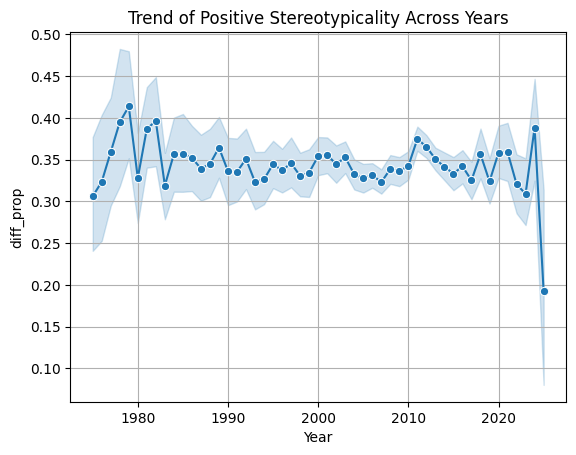

In [48]:
sns.lineplot(data=df_contemp, x='year', y='prop_pos', marker='o')

plt.title('Trend of Positive Stereotypicality Across Years')
plt.xlabel('Year')
plt.ylabel('diff_prop')
plt.grid(True)
plt.show()

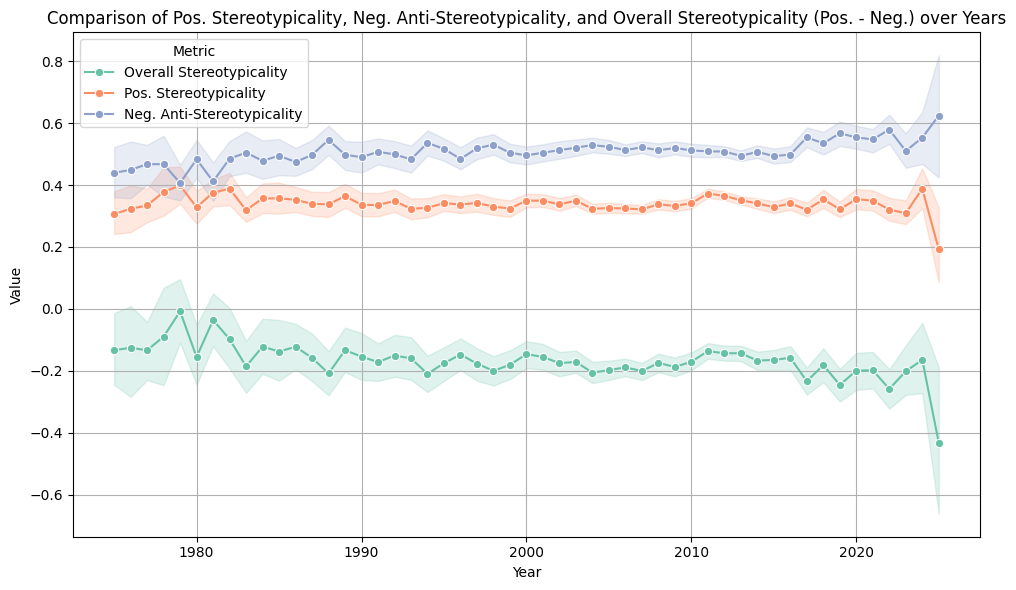

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First, reshape to long format
df_long = df_contemp.melt(id_vars='year', value_vars=['diff_prop', 'prop_pos', 'prop_neg'],
                          var_name='Variable', value_name='Value')

# Map old variable names to nice labels
label_map = {
    'prop_pos': 'Pos. Stereotypicality',
    'prop_neg': 'Neg. Anti-Stereotypicality',
    'diff_prop': 'Overall Stereotypicality'
}

df_long['Variable'] = df_long['Variable'].map(label_map)

# Now plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='year', y='Value', hue='Variable', marker='o', palette='Set2')

plt.title('Comparison of Pos. Stereotypicality, Neg. Anti-Stereotypicality, and Overall Stereotypicality (Pos. - Neg.) over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()
